# Image Classification with TensorFlow
### Using the MNIST dataset

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# Get mnist data set
mnist = input_data.read_data_sets("./data/", one_hot=True, reshape=False)



Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


## Displaying Example Images

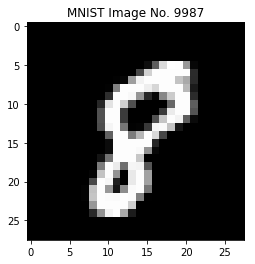

In [22]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

index_of_image_to_view = 9987
plot_title = "MNIST Image No. %s" % index_of_image_to_view

image_pixels_array = mnist.train.images[index_of_image_to_view]
image_pixels_reshaped = np.reshape(image_pixels_array, (28, 28)) 

plt.title(plot_title)
plt.imshow(image_pixels_reshaped, cmap='gray')
plt.show()

## Network Parameters

In [23]:
# Settings

learning_rate = 0.005
training_epochs = 80
batch_size = 256
display_step = 1
n_input = 784       # MNIST images are 28*28 px, =784
n_classes = 10      # number of digits

n_hidden_layer_features = 256

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer_features])),
    'output': tf.Variable(tf.random_normal([n_hidden_layer_features, n_classes]))
}

biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer_features])),
    'output': tf.Variable(tf.random_normal([n_classes]))
}

## Input

In [24]:
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

flat_features = tf.reshape(x, [-1, n_input])

## Network

In [25]:
# Hidden layer with ReLU activation function

def ReLU_Network(flat_features, weights, biases):
    hidden_layer = tf.add(tf.matmul(flat_features, weights['hidden_layer']), biases['hidden_layer'])
    hidden_layer = tf.nn.relu(hidden_layer)

    # Output layer, simple linear activation
    logits = tf.add(tf.matmul(hidden_layer, weights['output']), biases['output'])
    return logits

# Cost
logits = ReLU_Network(flat_features, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# Optmimier
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Start Session

In [26]:
save_file = './trained_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        batches = int(mnist.train.num_examples/batch_size)
        step = 1
        for i in range(batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            
            # Print accuracy and loss
            if  step % batches == 0:
              
                # Calculate loss and accuracy
                loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
                acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
                
                message = "Loss = %s, Accuracy: %s" % (loss, acc)
                print(message)
                
            step += 1
    
    # Save the model
    saver.save(sess, save_file)
    print("Training Finished!")
        

Loss = 4.81221, Accuracy: 0.90625
Loss = 1.96905, Accuracy: 0.914062
Loss = 2.70033, Accuracy: 0.925781
Loss = 0.992314, Accuracy: 0.96875
Loss = 0.815255, Accuracy: 0.953125
Loss = 0.861149, Accuracy: 0.960938
Loss = 0.605924, Accuracy: 0.976562
Loss = 0.241812, Accuracy: 0.964844
Loss = 0.118306, Accuracy: 0.984375
Loss = 0.0367031, Accuracy: 0.996094
Loss = 0.012198, Accuracy: 0.996094
Loss = 0.101633, Accuracy: 0.988281
Loss = 0.0776152, Accuracy: 0.992188
Loss = 0.000116203, Accuracy: 1.0
Loss = 0.000392132, Accuracy: 1.0
Loss = 0.0007864, Accuracy: 1.0
Loss = 3.30404e-05, Accuracy: 1.0
Loss = 0.0268911, Accuracy: 0.996094
Loss = 0.0179508, Accuracy: 0.992188
Loss = 1.81747e-05, Accuracy: 1.0
Loss = 7.99914e-06, Accuracy: 1.0
Loss = 0.251167, Accuracy: 0.992188
Loss = 0.000782173, Accuracy: 1.0
Loss = 0.0178846, Accuracy: 0.996094
Loss = 3.969e-06, Accuracy: 1.0
Loss = 0.0219705, Accuracy: 0.996094
Loss = 0.0328069, Accuracy: 0.996094
Loss = 0.000835043, Accuracy: 1.0
Loss = 0.001

## Validation & Testing

In [30]:
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Accuracy: %s" % test_accuracy)    

Accuracy: 0.9726
